In [1]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2
from enhancer.options import *
from enhancer.training.lr_finder import *
from enhancer.losses import WassFeatureLoss,FeatureLoss
opt_path = "../configs/smallmodel/mse_train.yml"


../enhancer/training/lr_finder.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
  pip install torch-lr-finder -v --global-option="amp"


In [2]:
model = get_generator_from_yml(opt_path)
criterion =  WassFeatureLoss()
dataloader = get_dataloader_from_yml(opt_path)
trainloader = dataloader["train_dataloader"]

generator is loaded from /notebooks/pixelEnhancer/checkpoints/verysmall_best_wass_x4_imdn_rtc_20_6_1.pt


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


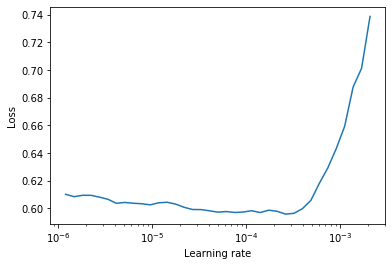

In [3]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-7, weight_decay=0)
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot()